# Pandas for Financial Data Analysis

###What is Pandas?

Pandas is a data analysis library built on Numpy.

###Pandas Features

- Database-like tables with cells and columns
- Dataframes (two dimensional arrays)
- Data cleaning: can remove duplicates, manage missing values, align tables by index
- Create "pivot tables" 
- SQL operators such as "Join" and "Group By"
- Can handle CSV, Excel, txt files
- Export data to CSV 
- inline data visualization featuring Matplotlib

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.io.data as web
import datetime

*Quick note: io.data subpackage will be depricated in Pandas version 0.17. Use with caution!

###Let's Get Started

There are a few ways to import data into Pandas:
    * Local files
    * Remote files
    * Remote Data Access (using the pandas.io API)

####Pandas.io API

* use an API to retrieve historical data from SP500
* use API to retrieve specific date's stock price

In [3]:
start = datetime.datetime(2010, 1, 1)

end = datetime.datetime(2015, 8, 24)

sp500 = web.DataReader("%5EGSPC", 'yahoo', start, end)

sp500.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,1132.989990
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,1136.520020
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,1137.140015
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,1141.689941
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,1144.979980


In [4]:
ts = sp500[["Open", "Close"]][-10:]

ts

,Open,Close
Date,,
2015-08-11,2102.659912,2084.070068
2015-08-12,2081.100098,2086.050049
2015-08-13,2086.189941,2083.389893
2015-08-14,2083.149902,2091.540039
2015-08-17,2089.699951,2102.439941
2015-08-18,2101.989990,2096.919922
2015-08-19,2095.689941,2079.610107
2015-08-20,2076.610107,2035.729980
2015-08-21,2034.079956,1970.890015


We can retrieve any historical data for stocks listed on Yahoo!Finance

In [5]:
start = datetime.datetime(2010, 1, 1)

end = datetime.datetime(2015, 8, 24)

ford = web.DataReader("F", 'yahoo', start, end)

ford.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,10.17,10.28,10.05,10.28,60855800,9.244219
2010-01-05,10.45,11.24,10.40,10.96,215620200,9.855705
2010-01-06,11.21,11.46,11.13,11.37,200070600,10.224394
2010-01-07,11.46,11.69,11.32,11.66,130201700,10.485175
2010-01-08,11.67,11.74,11.46,11.69,130463000,10.512152


###Yahoo! API

Type the following into your web browser:
    
    http://chartapi.finance.yahoo.com/instrument/1.0/F/chartdata;type=quote;range=1y/csv

###Let's take a look at downloading files from the web:

What types of files can we import into Pandas?

###Tab completion 

In [3]:
pd.read_<TAB>

<function pandas.io.parsers._make_parser_function.<locals>.parser_f>

- tab completion will display all of the functions available to you. 

In [6]:
pd.read_csv?

- Displays documentation for a function

###Read a CSV file from the Web

In [7]:

twitter_data = pd.read_csv("http://real-chart.finance.yahoo.com/table.csv?s=TWTR&d=8&e=24&f=2015&g=d&a=10&b=7&c=2013&ignore=.csv", 
                           header=0, index_col="Date")

#### Print the first five rows of our dataset using the Head function

In [8]:
twitter_data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-26,24.799999,25.290001,23.830000,25.030001,19822500,25.030001
2015-08-25,26.290001,26.330000,24.379999,24.379999,19677400,24.379999
2015-08-24,23.610001,26.230000,21.010000,25.170000,30012000,25.170000
2015-08-21,25.650000,26.740000,25.510000,25.870001,23545900,25.870001
2015-08-20,27.150000,27.480000,25.920000,26.000000,25032500,26.000000


####Print the last ten rows of our dataset using the Tail function

In [9]:
twitter_data.tail(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-11-20,41.400002,41.750000,40.509998,41.049999,5767300,41.049999
2013-11-19,41.389999,41.900002,40.000000,41.750000,7436600,41.750000
2013-11-18,43.500000,43.950001,40.849998,41.139999,12810600,41.139999
2013-11-15,45.250000,45.270000,43.430000,43.980000,8010600,43.980000
2013-11-14,42.340000,45.669998,42.240002,44.689999,11099400,44.689999
2013-11-13,41.029999,42.869999,40.759998,42.599998,8688300,42.599998
2013-11-12,43.660000,43.779999,41.830002,41.900002,6316700,41.900002
2013-11-11,40.500000,43.000000,39.400002,42.900002,16113900,42.900002
2013-11-08,45.930000,46.939999,40.689999,41.650002,27925300,41.650002


####View the entire dataset

In [10]:
twitter_data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-26,24.799999,25.290001,23.830000,25.030001,19822500,25.030001
2015-08-25,26.290001,26.330000,24.379999,24.379999,19677400,24.379999
2015-08-24,23.610001,26.230000,21.010000,25.170000,30012000,25.170000
2015-08-21,25.650000,26.740000,25.510000,25.870001,23545900,25.870001
2015-08-20,27.150000,27.480000,25.920000,26.000000,25032500,26.000000
2015-08-19,28.059999,28.090000,27.160000,27.610001,19810200,27.610001
2015-08-18,28.910000,29.000000,28.299999,28.299999,9536900,28.299999
2015-08-17,29.190001,29.340000,28.930000,29.059999,9493400,29.059999
2015-08-14,28.500000,29.270000,28.450001,29.059999,16489700,29.059999


####A few things to note:
- Pandas will print the first 30 and last 30 rows by default to save memory
- Once printed, Pandas will provide a summary of the rows and columns in the dataframe
- Pandas assigns row numbers to the dataset
- The header row is excluded in the total row count

###We can make new dataframes from a subset of our original data

In [11]:
snapshot = twitter_data[2:24]
snapshot

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-24,23.610001,26.230000,21.010000,25.170000,30012000,25.170000
2015-08-21,25.650000,26.740000,25.510000,25.870001,23545900,25.870001
2015-08-20,27.150000,27.480000,25.920000,26.000000,25032500,26.000000
2015-08-19,28.059999,28.090000,27.160000,27.610001,19810200,27.610001
2015-08-18,28.910000,29.000000,28.299999,28.299999,9536900,28.299999
2015-08-17,29.190001,29.340000,28.930000,29.059999,9493400,29.059999
2015-08-14,28.500000,29.270000,28.450001,29.059999,16489700,29.059999
2015-08-13,29.600000,29.600000,28.440001,28.540001,14811900,28.540001
2015-08-12,29.110001,29.500000,28.510000,29.389999,18513100,29.389999


###Let's Analyze Our Data

In [80]:
snapshot["Volume"]

Date
2015-08-20    25032500
2015-08-19    19810200
2015-08-18     9536900
2015-08-17     9493400
2015-08-14    16489700
2015-08-13    14811900
2015-08-12    18513100
2015-08-11    27749200
2015-08-10    42149400
2015-08-07    18224700
2015-08-06    27438800
2015-08-05    21092700
2015-08-04    21287900
2015-08-03    46530100
2015-07-31    17995400
2015-07-30    29311900
2015-07-29    92475800
2015-07-28    42042100
2015-07-27    24521100
2015-07-24    12872100
2015-07-23    10310700
2015-07-22    11724800
Name: Volume, dtype: int64

####Note that:

- Columns are indexed
- Returns the "Volume" column, and provides the data type at the end 
- A single column can also be subset as a Series (a one dimensional array with axis labels)

###Viewing Data Based on a Condition

In [81]:
snapshot["High"] > 36 

Date
2015-08-20    False
2015-08-19    False
2015-08-18    False
2015-08-17    False
2015-08-14    False
2015-08-13    False
2015-08-12    False
2015-08-11    False
2015-08-10    False
2015-08-07    False
2015-08-06    False
2015-08-05    False
2015-08-04    False
2015-08-03    False
2015-07-31    False
2015-07-30    False
2015-07-29    False
2015-07-28     True
2015-07-27    False
2015-07-24     True
2015-07-23     True
2015-07-22     True
Name: High, dtype: bool

#### This will return boolean values, which are not descriptive enough for our analysis...

* we want to view the full dataset that meets our condition

####If we want to find the days where the stock price high is greater than $36 per share, we can display it like so:

In [12]:
snapshot[snapshot.High > 36]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-07-28,34.700001,36.669998,34.139999,36.540001,42042100,36.540001
2015-07-24,36.410000,36.410000,35.299999,35.419998,12872100,35.419998


####We find the dates where the Low price is greater than 36 dollars per share AND the Close price is less than 37

In [13]:
snapshot[(snapshot.Low >= 36) & (snapshot.Close < 37)]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


###Going back to our original dataframe...

####The Sort function

####Find data where the Open price is higher than 65 dollars per share and sort by Volume

In [15]:
t = twitter_data


t[t.Open > 65].sort('Volume')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-02-04,66.250000,66.370003,64.500000,66.320000,13017400,66.320000
2014-02-03,65.919998,66.480003,64.209999,65.250000,17890300,65.250000
2014-02-05,67.160004,67.239998,64.800003,65.970001,31504900,65.970001
2014-01-07,67.669998,67.730003,61.389999,61.459999,31748400,61.459999
2014-01-03,69.000000,70.430000,68.430000,69.000000,33207200,69.000000
2013-12-24,66.339996,70.870003,65.559998,69.959999,35802700,69.959999
2013-12-27,70.099998,71.250000,63.689999,63.750000,60418700,63.750000
2013-12-26,72.879997,74.730003,69.129997,73.309998,82761100,73.309998


#### Basic Descriptive Statistical Analysis of our dataframe

In [16]:
t.describe()

,Open,High,Low,Close,Volume,Adj Close
count,453.000000,453.000000,453.000000,453.000000,4.530000e+02,453.000000
mean,43.892163,44.733929,42.965806,43.799139,2.263936e+07,43.799139
std,8.897670,9.135434,8.655735,8.901575,1.637880e+07,8.901575
min,23.610001,25.290001,21.010000,24.379999,4.107000e+06,24.379999
25%,37.099998,37.799999,36.509998,37.049999,1.302650e+07,37.049999
50%,41.939999,42.950001,40.830002,41.779999,1.855890e+07,41.779999
75%,50.639999,51.599998,49.509998,50.400002,2.640410e+07,50.400002
max,72.879997,74.730003,69.129997,73.309998,1.347100e+08,73.309998


###Simple calculations and appending a dataframe

####Add a column to calculate the percent change from the day's stock low to the day's stock high

In [17]:

t["Change"] = (t.High - t.Low)/t.Low * 100
t.head()

,Open,High,Low,Close,Volume,Adj Close,Change
Date,,,,,,,
2015-08-26,24.799999,25.290001,23.830000,25.030001,19822500,25.030001,6.126735
2015-08-25,26.290001,26.330000,24.379999,24.379999,19677400,24.379999,7.998364
2015-08-24,23.610001,26.230000,21.010000,25.170000,30012000,25.170000,24.845312
2015-08-21,25.650000,26.740000,25.510000,25.870001,23545900,25.870001,4.821639
2015-08-20,27.150000,27.480000,25.920000,26.000000,25032500,26.000000,6.018519


In [18]:
close = t['Adj Close']
ma = pd.rolling_mean(close, 50)

ma[-50:]

Date
2014-01-21    55.2166
2014-01-17    55.5210
2014-01-16    55.7990
2014-01-15    56.0844
2014-01-14    56.3222
2014-01-13    56.5900
2014-01-10    56.7724
2014-01-09    56.9380
2014-01-08    57.1054
2014-01-07    57.3322
2014-01-06    57.6332
2014-01-03    57.9906
2014-01-02    58.2996
2013-12-31    58.5342
2013-12-30    58.6730
2013-12-27    58.8580
2013-12-26    59.2438
2013-12-24    59.5654
2013-12-23    59.7856
2013-12-20    59.8892
2013-12-19    59.9514
2013-12-18    59.9760
2013-12-17    60.0308
2013-12-16    60.0648
2013-12-13    60.1294
2013-12-12    60.1186
2013-12-11    60.0662
2013-12-10    59.9904
2013-12-09    59.8548
2013-12-06    59.6212
2013-12-05    59.4236
2013-12-04    59.1338
2013-12-03    58.8124
2013-12-02    58.4986
2013-11-29    58.1930
2013-11-27    57.9310
2013-11-26    57.6762
2013-11-25    57.3704
2013-11-22    57.1898
2013-11-21    56.7116
2013-11-20    56.2062
2013-11-19    55.7362
2013-11-18    55.2690
2013-11-15    54.8792
2013-11-14    54.5840
2013-

###Merging CSV Files

####Create three new dataframes from three separate csv files

In [19]:
lnkd15_df = pd.read_csv("C:\\Users\\Melodie.Wilson\\Desktop\\pandas_walkthrough\\lnkd_hist2015.csv", header=0, index_col="Date")
lnkd14_df = pd.read_csv("C:\\Users\\Melodie.Wilson\\Desktop\pandas_walkthrough\\lnkd_hist2014.csv", header=0, index_col="Date")
lnkd13_df = pd.read_csv("C:\\Users\\Melodie.Wilson\\Desktop\\pandas_walkthrough\\lnkd_hist2013.csv", header=0, index_col="Date")

####Combine dataframes into a single list

In [20]:
frames = [lnkd15_df, lnkd14_df, lnkd13_df]

####Concat the list into a single dataframe

In [21]:
lnkd_full = pd.concat(frames)

In [22]:
pd.concat?

####Print the head and tail to make sure we combined the dataframes correctly

In [23]:
lnkd_full.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
7/7/2015,208.679993,212.440002,203.610001,210.979996,2041600,210.979996
7/6/2015,205.380005,209.850006,205.139999,209.449997,1398200,209.449997
7/2/2015,208.000000,208.750000,207.059998,207.759995,790200,207.759995
7/1/2015,208.869995,209.259995,206.339996,207.960007,1313500,207.960007
6/30/2015,205.500000,209.089996,204.979996,206.630005,1591500,206.630005


In [24]:
lnkd_full

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
7/7/2015,208.679993,212.440002,203.610001,210.979996,2041600,210.979996
7/6/2015,205.380005,209.850006,205.139999,209.449997,1398200,209.449997
7/2/2015,208.000000,208.750000,207.059998,207.759995,790200,207.759995
7/1/2015,208.869995,209.259995,206.339996,207.960007,1313500,207.960007
6/30/2015,205.500000,209.089996,204.979996,206.630005,1591500,206.630005
6/29/2015,210.000000,211.050003,202.750000,203.550003,2690000,203.550003
6/26/2015,217.559998,217.970001,215.240005,215.929993,836000,215.929993
6/25/2015,215.729996,218.000000,215.550003,217.889999,777100,217.889999
6/24/2015,216.750000,218.220001,215.259995,215.699997,793100,215.699997


In [25]:
lnkd15_df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
7/7/2015,208.679993,212.440002,203.610001,210.979996,2041600,210.979996
7/6/2015,205.380005,209.850006,205.139999,209.449997,1398200,209.449997
7/2/2015,208.000000,208.750000,207.059998,207.759995,790200,207.759995
7/1/2015,208.869995,209.259995,206.339996,207.960007,1313500,207.960007
6/30/2015,205.500000,209.089996,204.979996,206.630005,1591500,206.630005
6/29/2015,210.000000,211.050003,202.750000,203.550003,2690000,203.550003
6/26/2015,217.559998,217.970001,215.240005,215.929993,836000,215.929993
6/25/2015,215.729996,218.000000,215.550003,217.889999,777100,217.889999
6/24/2015,216.750000,218.220001,215.259995,215.699997,793100,215.699997


In [92]:
lnkd_full.to_csv("C:\\Users\\Melodie.Wilson\\Desktop\\merged.csv", header=True)

###What if my data is a little more messy?

* Pandas can exclude rows that we don't want included in our dataset

In [26]:
axp_data = pd.read_table("C:\\Users\\Melodie.Wilson\\Desktop\\pandas_walkthrough\\axp_hist.csv", 
                         sep=",", skiprows=8, engine="python", parse_dates=[[0,1]], index_col=0)

In [27]:
axp_data.head(10)

,Open,High,Low,Close,Volume,Adj Close
Date_Year,,,,,,
21-Aug 2015,78.120003,78.610001,77.029999,77.029999,8344100,77.029999
20-Aug 2015,80.110001,80.459999,78.730003,78.760002,7185100,78.760002
19-Aug 2015,80.919998,81.660004,80.410004,80.949997,5310900,80.949997
18-Aug 2015,81.050003,81.419998,80.699997,81.239998,4455600,81.239998
17-Aug 2015,80.389999,81.169998,80.250000,81.000000,4567500,81.000000
14-Aug 2015,80.510002,81.330002,80.419998,80.910004,5366600,80.910004
13-Aug 2015,81.000000,81.000000,80.379997,80.760002,4713300,80.760002
12-Aug 2015,80.720001,81.089996,79.800003,81.000000,6945600,81.000000
11-Aug 2015,80.430000,81.650002,80.250000,81.339996,8228100,81.339996


####The read_table function

In [28]:
pd.read_table?

##Plotting our Data

* use matplotlib inline to display plots of our data directly into the notebook

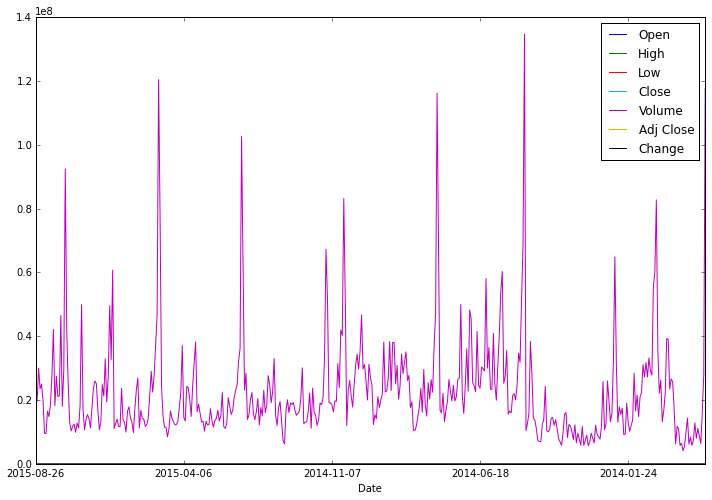

In [29]:
t.plot(figsize=(12, 8))

* data is not easy to read. Let's add some parameters to make sense of our data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000007E577B8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000008FED470>], dtype=object)

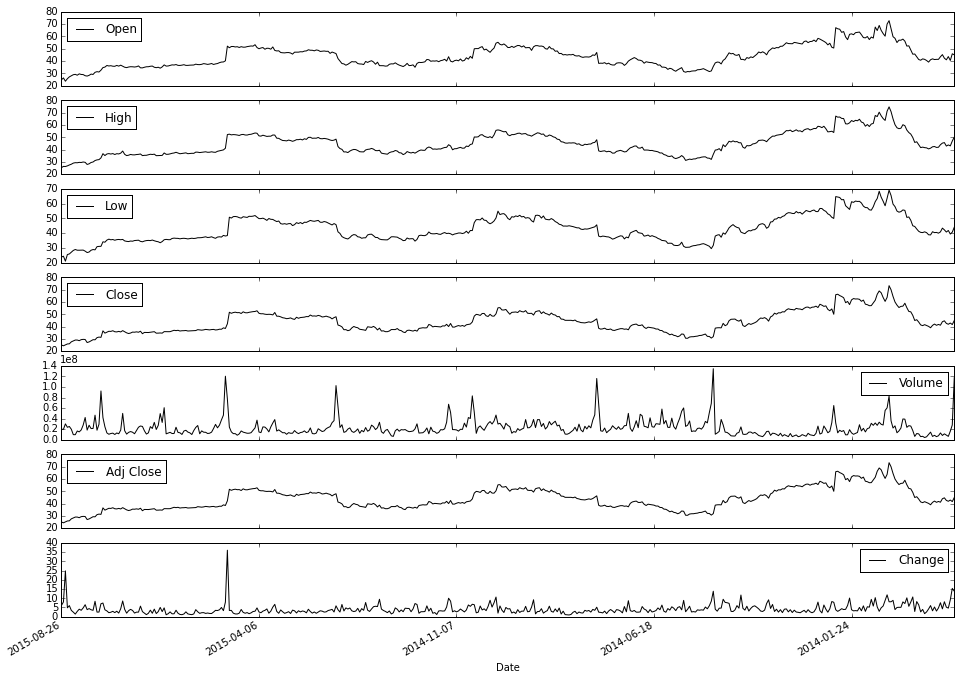

In [30]:
t.plot(subplots=True, figsize=(16, 12))

####Histograms of an individual column within a datframe

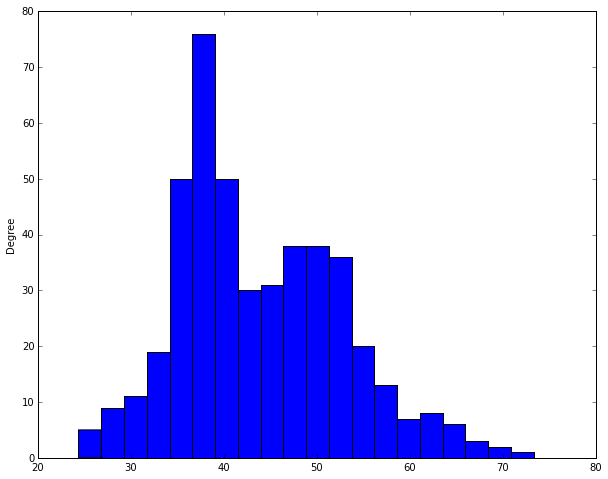

In [31]:
t["Adj Close"].plot(kind='hist', stacked=True, bins=20, figsize=(10,8), color='b')


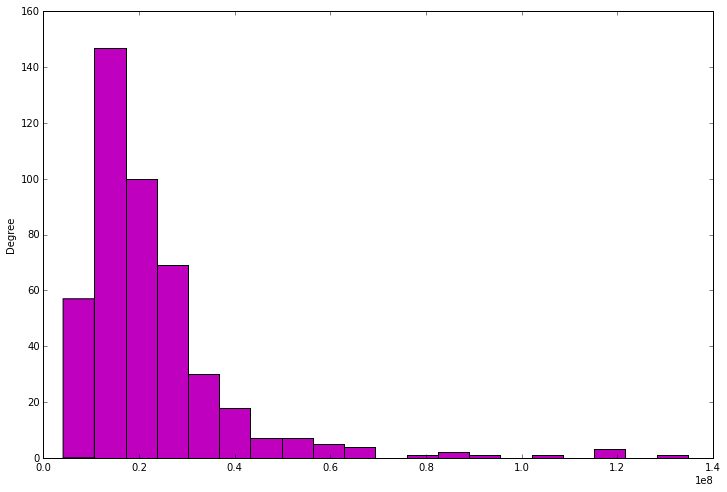

In [32]:
t["Volume"].plot(kind='hist', stacked=True, bins=20, figsize=(12,8), color='m')

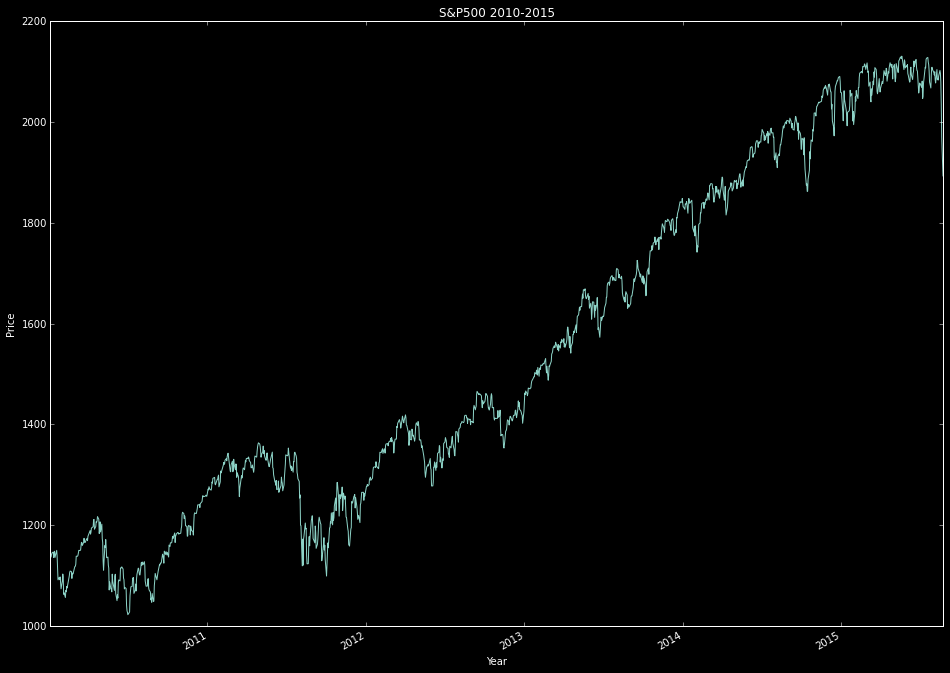

In [33]:
plt.style.use('dark_background')


sp500["Adj Close"].plot(figsize=(16, 12))
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('S&P500 2010-2015')

plt.show()

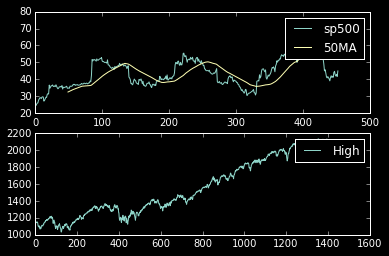

In [34]:
ax1 = plt.subplot(2, 1, 1)
ax1.plot(close, label="sp500")
ax1.plot(ma, label="50MA")
plt.legend()

ax2 = plt.subplot(2, 1, 2)
ax2.plot(sp500["High"], label = "High")
plt.legend()
plt.show()

In [35]:
axp_close = axp_data['Close'][-50:]
moving_average = pd.rolling_mean(axp_close, 50)

ma[-50:]

Date
2014-01-21    55.2166
2014-01-17    55.5210
2014-01-16    55.7990
2014-01-15    56.0844
2014-01-14    56.3222
2014-01-13    56.5900
2014-01-10    56.7724
2014-01-09    56.9380
2014-01-08    57.1054
2014-01-07    57.3322
2014-01-06    57.6332
2014-01-03    57.9906
2014-01-02    58.2996
2013-12-31    58.5342
2013-12-30    58.6730
2013-12-27    58.8580
2013-12-26    59.2438
2013-12-24    59.5654
2013-12-23    59.7856
2013-12-20    59.8892
2013-12-19    59.9514
2013-12-18    59.9760
2013-12-17    60.0308
2013-12-16    60.0648
2013-12-13    60.1294
2013-12-12    60.1186
2013-12-11    60.0662
2013-12-10    59.9904
2013-12-09    59.8548
2013-12-06    59.6212
2013-12-05    59.4236
2013-12-04    59.1338
2013-12-03    58.8124
2013-12-02    58.4986
2013-11-29    58.1930
2013-11-27    57.9310
2013-11-26    57.6762
2013-11-25    57.3704
2013-11-22    57.1898
2013-11-21    56.7116
2013-11-20    56.2062
2013-11-19    55.7362
2013-11-18    55.2690
2013-11-15    54.8792
2013-11-14    54.5840
2013-

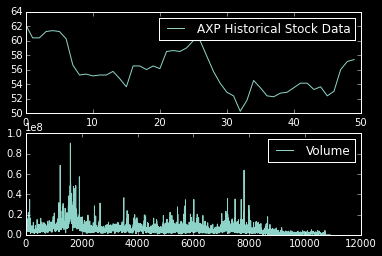

In [144]:
ax1 = plt.subplot(2, 1, 1)
ax1.plot(axp_close, label="AXP Historical Stock Data")
plt.legend()

ax2 = plt.subplot(2, 1, 2)
ax2.plot(axp_data["Volume"], label = "Volume")
plt.legend()
plt.show()

#Pandas for Financial Data Analysis

##Thank you!